In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = pd.read_excel("stock.xlsx",skiprows= 1)

In [37]:
data.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.019516,0.013399,1.902608,0.218617,0.60,0.40,0.488229,0.609445,0.780756,0.800000,0.68,0.333333
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.023829,0.006410,1.263287,0.128740,0.55,0.65,0.505279,0.508169,0.443776,0.414220,0.56,0.666667
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.080282,0.026548,1.894339,0.208272,0.55,0.50,0.728484,0.800000,0.776397,0.755594,0.56,0.466667
3,4,0.0,0.0,0.0,1.0,0.0,0.0,-0.006683,0.000728,1.425454,0.155526,0.55,0.35,0.384640,0.425836,0.529253,0.529196,0.56,0.266667
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.021999,0.004407,1.094579,0.106729,0.65,0.70,0.498046,0.479146,0.354852,0.319743,0.80,0.733333


In [20]:
data.dtypes

ID                                           int64
 Large B/P                                 float64
 Large ROE                                 float64
 Large S/P                                 float64
 Large Return Rate in the last quarter     float64
 Large Market Value                        float64
 Small systematic Risk                     float64
Annual Return                              float64
Excess Return                              float64
Systematic Risk                            float64
Total Risk                                 float64
Abs. Win Rate                              float64
Rel. Win Rate                              float64
Annual Return.1                            float64
Excess Return.1                            float64
Systematic Risk.1                          float64
Total Risk.1                               float64
Abs. Win Rate.1                            float64
Rel. Win Rate.1                            float64
dtype: object

In [21]:
x = data.iloc[:,1:13]
x.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.019516,0.013399,1.902608,0.218617,0.60,0.40
1,0.0,1.0,0.0,0.0,0.0,0.0,0.023829,0.006410,1.263287,0.128740,0.55,0.65
2,0.0,0.0,1.0,0.0,0.0,0.0,0.080282,0.026548,1.894339,0.208272,0.55,0.50
3,0.0,0.0,0.0,1.0,0.0,0.0,-0.006683,0.000728,1.425454,0.155526,0.55,0.35
4,0.0,0.0,0.0,0.0,1.0,0.0,0.021999,0.004407,1.094579,0.106729,0.65,0.70


In [22]:
y = data.iloc[:,13:]
y.head()

,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,0.488229,0.609445,0.780756,0.800000,0.68,0.333333
1,0.505279,0.508169,0.443776,0.414220,0.56,0.666667
2,0.728484,0.800000,0.776397,0.755594,0.56,0.466667
3,0.384640,0.425836,0.529253,0.529196,0.56,0.266667
4,0.498046,0.479146,0.354852,0.319743,0.80,0.733333


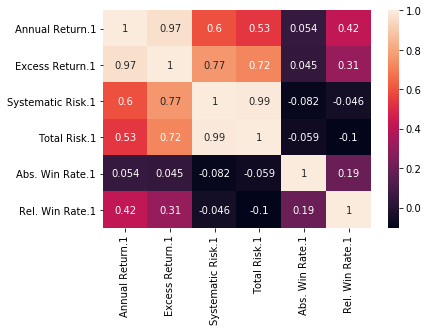

In [23]:
sns.heatmap(y.corr(),annot = True )

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print(lm.intercept_) #Independent term in the linear Model

[ 0.41106417  0.41528141 -0.22208957 -0.1383648  -0.76       -0.2       ]


In [29]:
y_pred = lm.predict(X_test)

In [30]:
pd.DataFrame(y_pred).head()

,0,1,2,3,4,5
0,0.571021,0.542471,0.304153,0.293441,0.68,0.666667
1,0.628204,0.603388,0.400817,0.373219,0.56,0.533333
2,0.488229,0.609445,0.780756,0.800000,0.68,0.333333
3,0.665024,0.640644,0.419420,0.398810,0.80,0.666667
4,0.200000,0.200000,0.231205,0.243037,0.20,0.200000


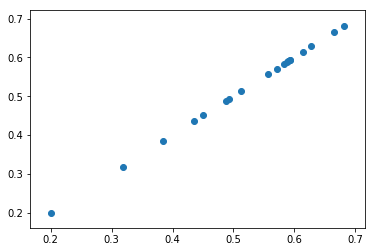

In [31]:
plt.scatter(pd.DataFrame(y_test).iloc[:,0:1],pd.DataFrame(y_pred).iloc[:,0:1])

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))

MAE: 2.035408878479454e-16


In [34]:
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))

MSE: 7.283394014247588e-32


In [35]:
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE: 2.6987763920428063e-16
